In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
import seaborn as sns

print('Esperamos trabalhar no diretório')
print(os.getcwd())



Esperamos trabalhar no diretório
c:\Users\renat\OneDrive\Área de Trabalho\projeto 2 cdados\22-2a-cd-p2-grupo_bexcamrefe


INTRODUÇÃO
Explicar objetivo do trabalho
Apresentar banco de dados
Definição de Target e Feature

Prever: A probabilidade de um voo americano em Janeiro vai ser cancelado.
Pergunta: Qual a probabilidade do meu voo ser cancelado de acordo com a sua cia aéra?

MINERAÇÃO DE DADOS
Limpeza do dataset

In [158]:
# FILTRANDO APENAS DADOS INTERESSANTES
dados_2019 = pd.read_csv('Jan_2019_ontime.csv', sep=',')
# manter: OP_CARRIER, ORIGIN, DESTINATION, CANCELLED, DIVERTED, DISTANCE

Novos_dados_2019 = dados_2019.loc[:,['OP_CARRIER','ORIGIN', 'DEST','CANCELLED','DISTANCE']]
Novos_dados_2019["Ano"]="2019"
Novos_dados_2019.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
0,9E,GNV,ATL,0.0,300.0,2019
1,9E,MSP,CVG,0.0,596.0,2019
2,9E,DTW,CVG,0.0,229.0,2019
3,9E,TLH,ATL,0.0,223.0,2019
4,9E,ATL,FSM,0.0,579.0,2019


In [159]:
dados_2020 = pd.read_csv('Jan_2020_ontime.csv')
# manter: OP_CARRIER, ORIGIN, DESTINATION, CANCELLED, DIVERTED, DISTANCE

Novos_dados_2020 = dados_2020.loc[:,['OP_CARRIER','ORIGIN', 'DEST','CANCELLED','DISTANCE']]
Novos_dados_2020["Ano"]="2020"
Novos_dados_2020.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
0,EV,ORD,GRB,0.0,174.0,2020
1,EV,TUL,ORD,0.0,585.0,2020
2,EV,EWR,TYS,0.0,631.0,2020
3,EV,BTR,IAH,0.0,253.0,2020
4,EV,RIC,IAH,0.0,1157.0,2020


In [160]:
Dados_gerais = pd.merge(Novos_dados_2020 , Novos_dados_2019, how = 'outer') # JUNTANDO AS DUAS BASES DE DADOS

Dados_gerais['OP_CARRIER'] = Dados_gerais['OP_CARRIER'].astype('category')
Dados_gerais['ORIGIN'] = Dados_gerais['ORIGIN'].astype('category')
Dados_gerais['DEST'] = Dados_gerais['DEST'].astype('category')
Dados_gerais['CANCELLED'] = Dados_gerais['CANCELLED'].astype('category')



In [161]:
Comparador = pd.read_csv('Pasta1.csv')
print(Comparador)

   OP_CARRIER                Airline Name
0          Dl             Delta Air Lines
1          AA     American Airlines Cargo
2          WN          Southwest Airlines
3          OO            SkyWest Airlines
4          UA       United Airlines Cargo
5          YX            Midwest Airlines
6          MQ                   Envoy air
7          B6                     JetBlue
8          9E                    Endeavor
9          AS             Alaska Airlines
10         YV               Mesa Airlines
11         NK             Spirit Airlines
12         EV  Atlatic Southeast Airlines
13         F9             FRONTIER FLIGHT
14         G4               Allegiant Air
15         HA           Hawaiian Airlines
16         OH     Comair Delta Connection


In [162]:
Dados_gerais['OP_CARRIER'].cat.categories = [' Endeavor','American Airlines Cargo','Alaska Airlines','JetBlue','Delta Air Lines','Atlatic Southeast Airlines','Frontier Flight','Allegiant Air','Hawaiian Airlines','Envoy Air','Spirit Airlines','Comair Delta Connection','SkyWest Airlines','United Airlines Cargo','Southwest Airlines','Mesa Airlines','Midwest Airlines']


In [163]:
Dados_gerais.head(5)


,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
0,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0,2020
1,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0,2020
2,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0,2020
3,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0,2020
4,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0,2020


In [164]:
Dados_gerais.dropna()

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
0,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0,2020
1,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0,2020
2,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0,2020
3,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0,2020
4,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0,2020
...,...,...,...,...,...,...
1191326,United Airlines Cargo,IAH,DTW,0.0,1075.0,2019
1191327,United Airlines Cargo,CVG,ORD,1.0,264.0,2019
1191328,United Airlines Cargo,PSP,ORD,1.0,1652.0,2019
1191329,United Airlines Cargo,ORD,PSP,1.0,1652.0,2019


In [165]:
# CHECANDO SE TEMOS VALORES NULOS
Cancelados = Dados_gerais[Dados_gerais['CANCELLED'] == 1.0]
Nao_cancelados = Dados_gerais[Dados_gerais['CANCELLED'] == 0.0]
#Voo_cancelados = Treinamento.loc[Cancelados,:]
#print(len(Voo_cancelados))
print(Cancelados.isnull().sum())
print(len(Cancelados))
print(Nao_cancelados.isnull().sum())
print(len(Nao_cancelados))
# --> está certo, resultados esperados pois voos cancelados não atrasam e não cancelados podem ainda assim atrasar.


OP_CARRIER    0
ORIGIN        0
DEST          0
CANCELLED     0
DISTANCE      0
Ano           0
dtype: int64
23654
OP_CARRIER    0
ORIGIN        0
DEST          0
CANCELLED     0
DISTANCE      0
Ano           0
dtype: int64
1167677


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
0.0,1167677.0,801.283,590.548,31.0,368.0,641.0,1042.0,5095.0
1.0,23654.0,630.156,453.121,31.0,299.0,522.0,836.0,4475.0


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
True,23654.0,630.156,453.121,31.0,299.0,522.0,836.0,4475.0


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
False,1167677.0,801.283,590.548,31.0,368.0,641.0,1042.0,5095.0


Text(0, 0.5, 'Frequência absoluta')

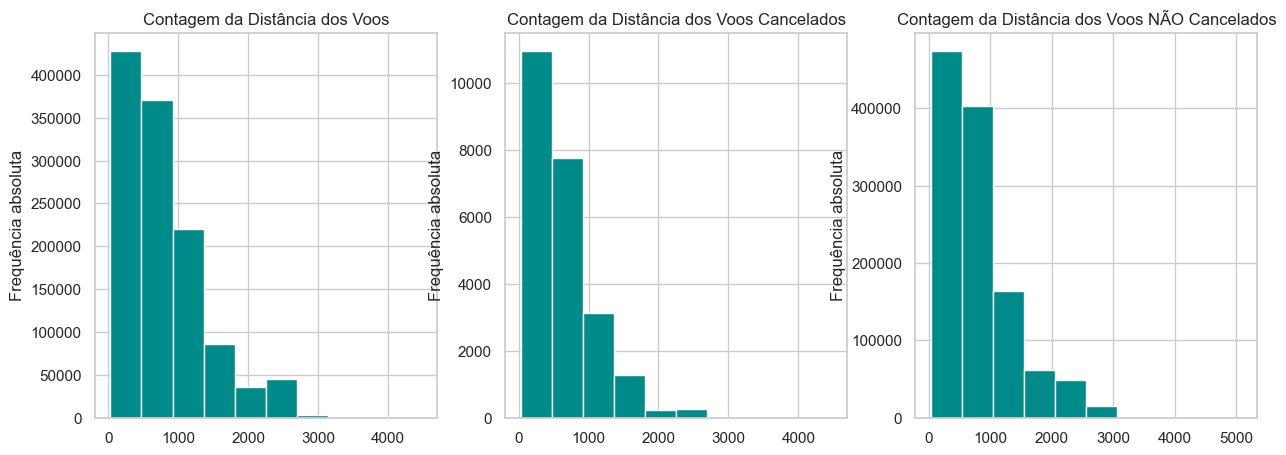

In [166]:
# Nosso Target --> qualitativo (SIM/NÃO --> 1.0/0.0 --> CANCELADO/NÃO CANCELADO), por isso temos que 
# Estudar as relações com base em gráficos de QualitativasXQuantitativas e QualitativasXQualitativas

# CANCELADOS X DISTANCIA --> único caso qualixquant do nosso df
display(Dados_gerais.groupby(by= [Dados_gerais.CANCELLED]).DISTANCE.describe().round(3))
display(Cancelados.groupby(by= [Cancelados.CANCELLED == 1.0]).DISTANCE.describe().round(3))
display(Nao_cancelados.groupby(by= [Nao_cancelados.CANCELLED == 1.0]).DISTANCE.describe().round(3))

amplitude = Dados_gerais.DISTANCE.max()-Dados_gerais.DISTANCE.min()
amplitude_faixa= amplitude/ 10
faixa= np.arange(30, 5100.0, amplitude_faixa )

amplitude_cancelados = Cancelados.DISTANCE.max()-Cancelados.DISTANCE.min()
amplitude_faixa_cancelados = amplitude_cancelados / 10
faixa_canc = np.arange(30, 4480.0, amplitude_faixa_cancelados )

amplitude_nao_cancelados = Nao_cancelados.DISTANCE.max()-Nao_cancelados.DISTANCE.min()
amplitude_faixa_nao_cancelados = amplitude_nao_cancelados / 10
faixa_nao_canc = np.arange(30, 5100.0, amplitude_faixa_nao_cancelados )


plt.figure(figsize=(15, 5))
# GRÁFICO DA DISTÂNCIA POR VOO
plt.subplot(131)
plt.hist(Dados_gerais.DISTANCE, bins=faixa_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos')
plt.ylabel('Frequência absoluta')
# GRÁFICO CANCELADOS
plt.subplot(132)
plt.hist(Cancelados.DISTANCE, bins=faixa_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos Cancelados')
plt.ylabel('Frequência absoluta')
# GRÁFICO NÃO CANCELADOS
plt.subplot(133)
plt.hist(Nao_cancelados.DISTANCE, bins=faixa_nao_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos NÃO Cancelados')
plt.ylabel('Frequência absoluta')



CANCELLED,0.0,1.0
OP_CARRIER,,
Envoy Air,94.7,5.3
Atlatic Southeast Airlines,95.3,4.7
SkyWest Airlines,96.9,3.1
Southwest Airlines,97.3,2.7
Midwest Airlines,97.5,2.5
Mesa Airlines,97.9,2.1
Comair Delta Connection,97.9,2.1
All,98.0,2.0
JetBlue,98.0,2.0


None


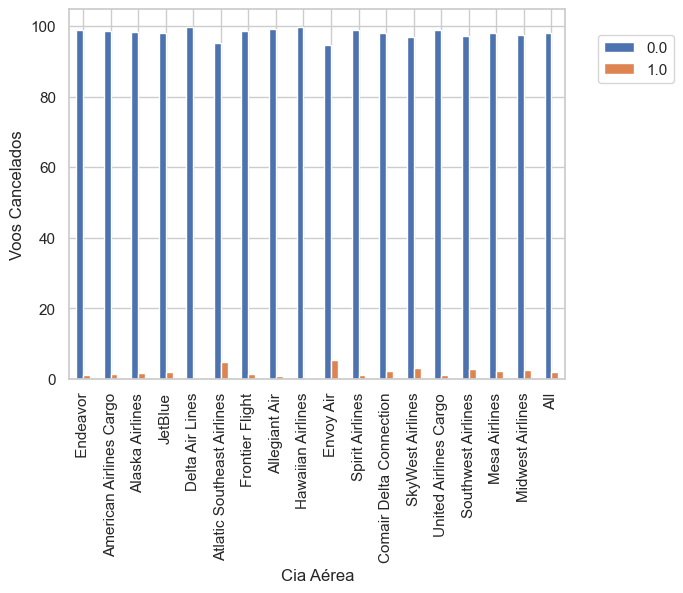

CANCELLED,0.0,1.0
DEST,,
ART,74.2,25.8
UIN,79.4,20.6
CMX,80.5,19.5
MKG,81.1,18.9
OGS,83.6,16.4
...,...,...
ROW,100.0,0.0
CDC,100.0,0.0
ITO,100.0,0.0


None


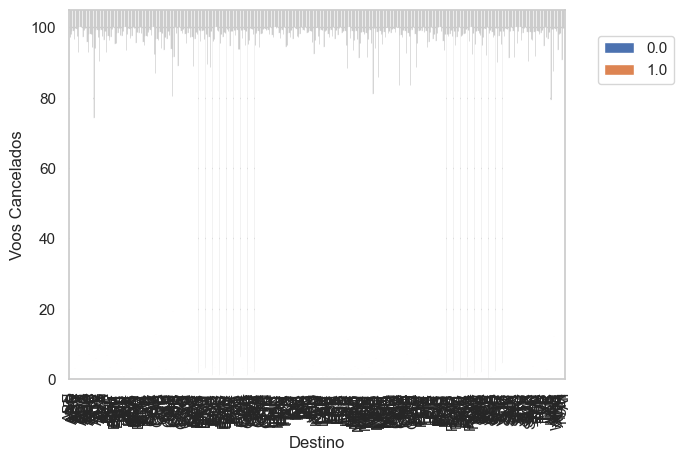

CANCELLED,0.0,1.0
ORIGIN,,
SUN,74.3,25.7
ART,75.8,24.2
OGS,79.5,20.5
UIN,80.9,19.1
MKG,81.3,18.7
...,...,...
BFM,100.0,0.0
ELM,100.0,0.0
PHF,100.0,0.0


None


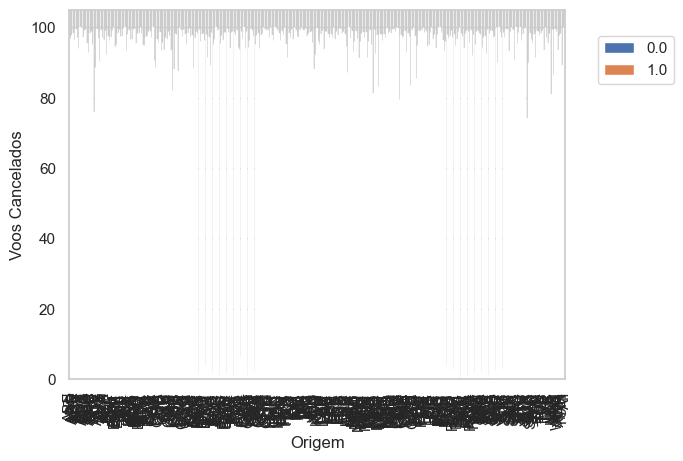

In [167]:
# CRUZAMENTO DE QUALITATIVAS CM QUALITATIVAS
# FAZER TABELA DE FREQUENCIAS + GRÁFICOS DE BARRA
# PLOTAR UM AO LADO DO OUTRO SE POSSÍVEL
# Cia X Cancelados
cia_canc = pd.crosstab(Dados_gerais['OP_CARRIER'], Dados_gerais['CANCELLED'],  normalize='index', margins=True).round(3)*100
cia_canc__ordenado = cia_canc.sort_values(0.0)
print(display(cia_canc__ordenado))
cia_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Cia Aérea')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Destino X Cancelados
dest_canc = pd.crosstab(Dados_gerais['DEST'], Dados_gerais['CANCELLED'], normalize='index',margins=True).round(3)*100
dest_canc_ordenado = dest_canc.sort_values(0.0)
print(display(dest_canc_ordenado))
dest_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Destino')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Origem X Cancelados
org_canc = pd.crosstab(Dados_gerais['ORIGIN'], Dados_gerais['CANCELLED'], normalize='index',margins=True).round(3)*100
org_canc_ordenado = org_canc.sort_values(0.0)
print(display(org_canc_ordenado))
org_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Origem')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()



In [168]:
# TESTE QUI-QUADRADO DE PEARSON - teste de independência entre variáveis ​​categóricas
# adotando alfa de significancia = 5% (0.05)
from scipy.stats import chi2_contingency
alpha = 0.05

# Dependendia do status do voo X CIA AREA 
stat, pcia, dof, expected = chi2_contingency(cia_canc)
print("p cia value is " + str(pcia))
if pcia <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independente da CIA aérea')

# Dependendia do status do voo X DESTINO
stat, pdest, dof, expected = chi2_contingency(dest_canc)
print("p dest value is " + str(pdest))
if pdest <= alpha:
    print('Destino é Dependente')
else:
    print('Independente do DESTINO')

# Dependendia do status do voo X ORIGEM
stat, porg, dof, expected = chi2_contingency(org_canc)
print("p dest value is " + str(porg))
if porg <= alpha:
    print('Dependente da Origem')
else:
    print('Independente da Origem')

p cia value is 0.4847666026409394
Independente da CIA aérea
p dest value is 8.105635264310385e-138
Destino é Dependente
p dest value is 8.499091028907559e-162
Dependente da Origem


MONTANDO O MODELO PREDITIVO
- aqui sim temos que dividir em uma parte de treinamento

In [169]:
Dados_gerais_00 = Dados_gerais 
Dados_gerais = Dados_gerais_00.sample(frac = 0.1)
# Creating dataframe with
# rest of the 50% values
rest_Dados_gerais = Dados_gerais_00.drop(Dados_gerais.index)

In [170]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Dados_gerais = Dados_gerais.dropna()
Dados_gerais.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
667090,Comair Delta Connection,CLT,GSP,0.0,75.0,2019
811539,American Airlines Cargo,JFK,ORD,0.0,740.0,2019
744429,Spirit Airlines,FLL,DEN,0.0,1703.0,2019
1088802,Delta Air Lines,ATL,LGA,0.0,762.0,2019
982990,United Airlines Cargo,CHS,EWR,0.0,628.0,2019


In [171]:
cat_vars = ['OP_CARRIER','ORIGIN', 'DEST']
for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(Dados_gerais[var],prefix = var)
    data1 = Dados_gerais.join(cat_list)
    Dados_gerais = data1
cat_vars = ['OP_CARRIER','ORIGIN', 'DEST']
data_vars=Dados_gerais.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [172]:
data_final=Dados_gerais[to_keep]
data_final.columns.values

array(['CANCELLED', 'DISTANCE', 'Ano', 'OP_CARRIER_ Endeavor',
       'OP_CARRIER_American Airlines Cargo', 'OP_CARRIER_Alaska Airlines',
       'OP_CARRIER_JetBlue', 'OP_CARRIER_Delta Air Lines',
       'OP_CARRIER_Atlatic Southeast Airlines',
       'OP_CARRIER_Frontier Flight', 'OP_CARRIER_Allegiant Air',
       'OP_CARRIER_Hawaiian Airlines', 'OP_CARRIER_Envoy Air',
       'OP_CARRIER_Spirit Airlines', 'OP_CARRIER_Comair Delta Connection',
       'OP_CARRIER_SkyWest Airlines', 'OP_CARRIER_United Airlines Cargo',
       'OP_CARRIER_Southwest Airlines', 'OP_CARRIER_Mesa Airlines',
       'OP_CARRIER_Midwest Airlines', 'ORIGIN_ABE', 'ORIGIN_ABI',
       'ORIGIN_ABQ', 'ORIGIN_ABR', 'ORIGIN_ABY', 'ORIGIN_ACT',
       'ORIGIN_ACV', 'ORIGIN_ACY', 'ORIGIN_ADK', 'ORIGIN_ADQ',
       'ORIGIN_AEX', 'ORIGIN_AGS', 'ORIGIN_ALB', 'ORIGIN_ALO',
       'ORIGIN_AMA', 'ORIGIN_ANC', 'ORIGIN_APN', 'ORIGIN_ART',
       'ORIGIN_ASE', 'ORIGIN_ATL', 'ORIGIN_ATW', 'ORIGIN_ATY',
       'ORIGIN_AUS', 'ORIGIN_

In [173]:
X = data_final.loc[:, data_final.columns != 'CANCELLED']
y = data_final.loc[:,['CANCELLED']]
y.value_counts()

CANCELLED
0.0          116748
1.0            2385
dtype: int64

In [174]:
data_final.head(5)



,CANCELLED,DISTANCE,Ano,OP_CARRIER_ Endeavor,OP_CARRIER_American Airlines Cargo,OP_CARRIER_Alaska Airlines,OP_CARRIER_JetBlue,OP_CARRIER_Delta Air Lines,OP_CARRIER_Atlatic Southeast Airlines,OP_CARRIER_Frontier Flight,...,DEST_UIN,DEST_USA,DEST_VEL,DEST_VLD,DEST_VPS,DEST_WRG,DEST_XNA,DEST_XWA,DEST_YAK,DEST_YUM
667090,0.0,75.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
811539,0.0,740.0,2019,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744429,0.0,1703.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1088802,0.0,762.0,2019,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
982990,0.0,628.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y= os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['CANCELLED'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['CANCELLED']==0]))
print("Number of subscription",len(os_data_y[os_data_y['CANCELLED']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['CANCELLED']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['CANCELLED']==1])/len(os_data_X))

length of oversampled data is  163424
Number of no subscription in oversampled data 81712
Number of subscription 81712
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [176]:

data_final_vars=data_final.columns.values.tolist()

y=['CANCELLED']
X=[i for i in data_final_vars if i not in y]

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

TypeError: cannot perform reduce with flexible type

MODELO DE PREDIÇÃO - RESULTADOS

VALIDAÇÃO DOS RESULTADOS

In [ ]:
# código de validação de resultados 